<a href="https://www.kaggle.com/code/swapnajak/dataanalyst-salary-eda-python?scriptVersionId=172714167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # EDA-Data Analyst/Scientist job Salaries 

# # Business Problem: 
 > **Business user of Staffing and Recruiting Company in Data Analytics sector intrested to discover "Revenue forecating".To estimate their future income they wants to know the insights ,tends and patterns from available data collected from various sources. To do this,As a Data Analyst ,we need to analyze the past data and plan their budget ,resources and strategies for their growth in upcoming year**.


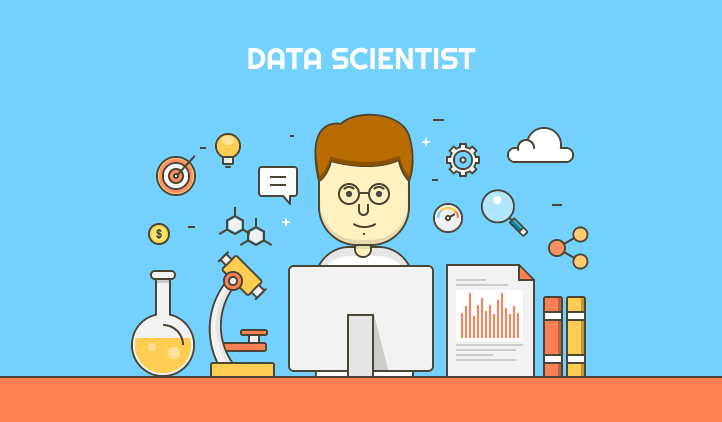

Investigation can be  perceive through EDA(Exploratory data analysis). As a Data Analyst ,I need to acess and analyse the historical data provided by comapny and I will be accountable to  analyze and investigate data sets and summarize their main characteristics,data visualization to share insights to Business User.
   First step can be achieved through finding out summary from Data. 

# 1. plan

<font size=3>
  To start with first step of the project we have to plan things  to perform analysis to ensure the results we produce are valid and applicable to any desired business outcomes and goals
    
      First, We have to access dataset of Data Scientist job salaries and find out the summary statistics.Here we have data with details like year, job_title,job_category ,Experinece, work_location and salary .
    
     Here we are exploring evey feature of data set to analze data it  in different prespective to better understand patterns within the data, detect outliers or anomalous events and find interesting relations among the variables.

# 2.Analyze

**To start Analysis we are using  jupyter notebook with Python **

Jupyter Notebook: Cloud based Kaggle Notebook 

Python :An interpreted, object-oriented programming language with dynamic semantics. Its high-level, built-in data structures. Python and EDA can be used together to identify missing values in a data set, which is important so you can decide how to handle missing values for machine learning

## 2.1 Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,STOPWORDS

# 2.2 Load Dataset

In [ ]:
df=pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')
df.head(10)

# 2.3 Understand Dataset

Here in this Dataset we have data for past three years for different job roles under various job catyegories worldwide.

  We also have details of different salries paid at differnt job_locations according to position and Experience_Level employee have. Also in considerations , some other key fileds like company_size and  work_setting like Remeote,on_sight or Hybrid
                
  In addition to that we also need to consider salary paid in USD at differnt locations so we will consider salary  paid in USD globally.
Employment Type also will be part of Analysis to find out the market requirement of Employment Type.

  To summarize we have access,clean,Analyse data to perform Exploratory Data Analysis (EDA) .
                



1.**Work_year**-  year of recording data

2.**Experience_level**- Experience level of employee (Entry,Mid,Senior,Executive)

3.'**employment_type**'-Type of Employment (Full-time ,Part-time,Free Lancer)

4.'**job_title**'- job title of job in Analytics (Data Engineer,Data Analyst,Data Sceintist..)

5.'**salary**'- salary amount 

6.'**salary_currency**' -currency of salary paid in different countires

7.'**salary_in_usd**'- salary in US Dollars

8.**'employee_residence**'-Employee Resident country

9.'**work_setting**'- work type 

10.**'company_location**'-company loacation country

11.'**company_size**'-size of the company

12.'**job_category**'- Main category of job 
******

## 2.4 Find out columns,Size of Data and Data Type

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.columns

## Check Null values

In [ ]:
df.isna().sum()

## 2.5 Initial Summary Statistics

## Univariate Analysis

  ### Categorical_columns
         'job_title', 
         'job_category', 
         'salary_currency',
         'employee_residence',
         'experience_level',
         'employment_type', 
         'work_setting',
         'company_location', 
         'company_size
 
 
 ###    Numerical Columns
          work_year
          salary
          salary_in_usd


In [ ]:
df.describe()

# 3.Analysis

* # 3.1 Job Analysis  

Here We have to perform job analysis to gain insights from data.
Find out what was the market requirement in past years and which job_category and job_title was in highest in demand in terms of

count of job openings,
highest paid salaries
differnt level of experience
differnt work locations in world

# Job Category Count Year wise

This will explain count of jobs avilable yearly

In [ ]:
Jobcategory_yearcount=df.groupby(['work_year','job_category']).agg({'job_category':'count'})
Jobcategory_yearcount

# Job Category Count yearly in Wordcloud(NLP)

In [ ]:
text=df['job_title'].str.cat(sep=',')
text

This Graph will show highest count job profile in highest text Size 

In [ ]:
plt.rcParams["figure.figsize"] = (7,6)
stopwords = set(STOPWORDS)
# Make Wordcloud
wordcloud = WordCloud(max_font_size=80, max_words=40, background_color="white",stopwords=stopwords, colormap='plasma').generate(text)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
     

# Top5 jobs openings in Market

In [ ]:
job_categoryTop5count=df['job_category'].value_counts()[:5]
job_categoryTop5count

In [ ]:
data = job_categoryTop5count.values
keys = job_categoryTop5count.keys() 
  
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

# Job category- Yearly Mean Salary

In [ ]:
sal_byJobcategory=df.sort_values(['salary_in_usd']).groupby(['work_year','job_category'])['salary_in_usd'].mean().reset_index()
sal_byJobcategory

In [ ]:
fig=plt.figure(figsize=(7,5))
sns.barplot(sal_byJobcategory,x='job_category',y='salary_in_usd',hue='work_year',dodge='bool',palette = "BuGn_r")
plt.xticks(rotation=75)
fig.show()

# 2.Job Title Wise Mean Salary

In [ ]:
JobTitle_sal=df.groupby('job_title')['salary_in_usd'].mean()
Top10JobTitle_sal=JobTitle_sal.sort_values(ascending=False)
key=Top10JobTitle_sal[::10].keys()
val=Top10JobTitle_sal[::10].values
Top10JobTitle_sal

In [ ]:
Top10JobTitle_sal=Top10JobTitle_sal[::10]
fig=plt.figure(figsize=(8,5))
sns.barplot(x=key, y=val)
plt.xticks(rotation=75)
plt.title("Top 10 highest paid Job Title ")
fig.show()

# # 3.2 Salary Analysis 

# Year wise Salary Analysis by Experince Level

In [ ]:
Exp_employmenttype=df.groupby(['work_year','experience_level'])['salary_in_usd'].mean().round(2,).reset_index()
Exp_employmenttype

In [ ]:
fig=plt.figure(figsize=(8,3))
ax=sns.barplot(data=Exp_employmenttype,x='work_year',y='salary_in_usd',hue='experience_level',errwidth=0,palette = "Blues_d")
for i in ax.containers:
    ax.bar_label(i,color='blue')
plt.show()

# Year wise Salary Analysis by Location

In [ ]:
salaryby_loc = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
salaryby_loc

In [ ]:
import plotly.express as px
data=df['company_location']
data

fig = px.scatter_geo(data,
                     hover_name=data , size_max=10,
                     title='Locations Around the World')
fig.show()